In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski as lp
import seaborn as sn
import matplotlib.pyplot as plt


# Configure RDKit logging
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)  # Set logging level to CRITICAL to minimize output


data_dna = pd.read_csv('data_dna_polymerase_beta.csv', delimiter=';')
data_dna.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL1410224,NaN,NaN,462.30,1.0,5.25,SID24793462,O=C(O)c1ccc(NC(=O)c2cn(-c3ccccc3)nc2-c2ccc(Br)...,Potency,'=',...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,89.1251
1,CHEMBL2107797,NORGESTREL,4.0,312.45,0.0,3.88,SID26719646,C#CC1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@...,Potency,'=',...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,100.0000
2,CHEMBL1445608,NaN,NaN,403.46,0.0,2.26,SID845645,CCN(CC)S(=O)(=O)c1ccc(NC(=O)Cn2c(=O)oc3ccccc32...,Potency,'=',...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,0.6310
3,CHEMBL1201236,CARBIDOPA ANHYDROUS,4.0,226.23,0.0,-0.05,SID8139862,C[C@@](Cc1ccc(O)c(O)c1)(NN)C(=O)O,Potency,'=',...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,89.1251
4,CHEMBL1327648,NaN,NaN,485.97,1.0,5.71,SID24790533,COc1ccc(CN2C(=O)/C(=C/c3ccc(-c4ccc(Cl)c(C(=O)O...,Potency,'=',...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,5.6234


In [3]:
data_dna.shape

(23383, 48)

In [4]:
drugbank = [mol for mol in Chem.SDMolSupplier("../data/drugbank.sdf") if mol]

In [5]:
# Convert to string and drop NaN values
mtor = [Chem.MolFromSmiles(str(smiles)) if isinstance(smiles, str) else None for smiles in data_dna["Smiles"]]

# Optionally, remove None values (invalid SMILES)
mtor = [mol for mol in mtor if mol is not None]

In [6]:
mtor[:5]

In [7]:
drugbank_mv = [rdescriptors.CalcExactMolWt(mol) for mol in drugbank]
mtor_mw = [rdescriptors.CalcExactMolWt(mol) for mol in mtor]

In [23]:
mtor_mw

AttributeError: 'list' object has no attribute 'avg'

In [9]:
segbank_hbd = [lp.NumHDonors(mol) for mol in drugbank]
mtor_hbd = [lp.NumHDonors(mol) for mol in mtor]

segbank_hba = [lp.NumHAcceptors(mol) for mol in drugbank]
mtor_hba = [lp.NumHAcceptors(mol) for mol in mtor]

segbank_logp = [Descriptors.MolLogP(mol) for mol in drugbank]
mtor_logp = [Descriptors.MolLogP(mol) for mol in mtor]

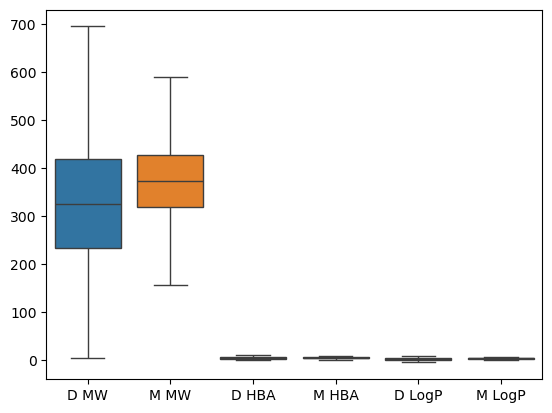

In [10]:
sn.boxplot([drugbank_mv, mtor_mw, segbank_hba, mtor_hba, segbank_logp, mtor_logp], showfliers=False)
plt.xticks(ticks=range(6), labels=["D MW", "M MW", "D HBA", "M HBA", "D LogP", "M LogP"])
plt.show()

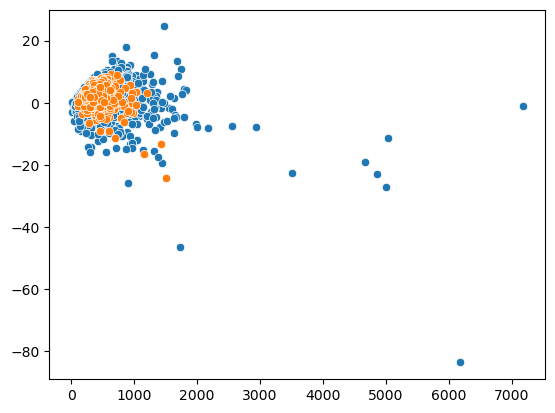

In [29]:
sn.scatterplot(x=drugbank_mv, y=segbank_logp)
sn.scatterplot(x=mtor_mw, y=mtor_logp)
plt.show()